In [1]:

'''
解决汉字乱码问题
'''
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体
plt.rcParams['axes.unicode_minus'] = False
import os
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体
plt.rcParams['axes.unicode_minus'] = False


# 1. 加载数据
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print(f"{os.path.basename(file_path)} 加载成功")
        return data
    except Exception as e:
        print(f"{os.path.basename(file_path)} 加载失败:", e)
        return None


# 2. 数据清理
def clean_data(data):
    # 检查缺失值
    missing_data = data.isnull().sum()
    print("缺失值统计:\n", missing_data[missing_data > 0])

    # 检查重复值
    duplicates = data.duplicated().sum()
    print("重复值数量:", duplicates)

    return data


file_paths = {
    "用户行为表": "电商平台行为数据表/用户行为表.csv",
    "用户表": "电商平台行为数据表/用户表.csv",
    "用户评论表": "电商平台行为数据表/用户评论表.csv",
    "用户购买信息表": "电商平台行为数据表/用户购买信息表.csv",
    "订单表": "电商平台行为数据表/订单表.csv"
}
# 加载各个CSV文件
user_behavior = load_data(file_paths["用户行为表"])
user_info = load_data(file_paths["用户表"])
user_comments = load_data(file_paths["用户评论表"])
purchase_info = load_data(file_paths["用户购买信息表"])
orders = load_data(file_paths["订单表"])

用户行为表.csv 加载成功
用户表.csv 加载成功
用户评论表.csv 加载成功
用户购买信息表.csv 加载成功
订单表.csv 加载成功


In [3]:
purchase_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15775 entries, 0 to 15774
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   买家会员名   15775 non-null  int64
 1   宝贝ID    15775 non-null  int64
 2   购买次数    15775 non-null  int64
dtypes: int64(3)
memory usage: 369.9 KB


In [4]:
purchase_info.head()

,买家会员名,宝贝ID,购买次数
0,0,42577833473,1
1,1,536728628605,1
2,1,545516801138,1
3,1,547644315780,1
4,1,550735773284,1


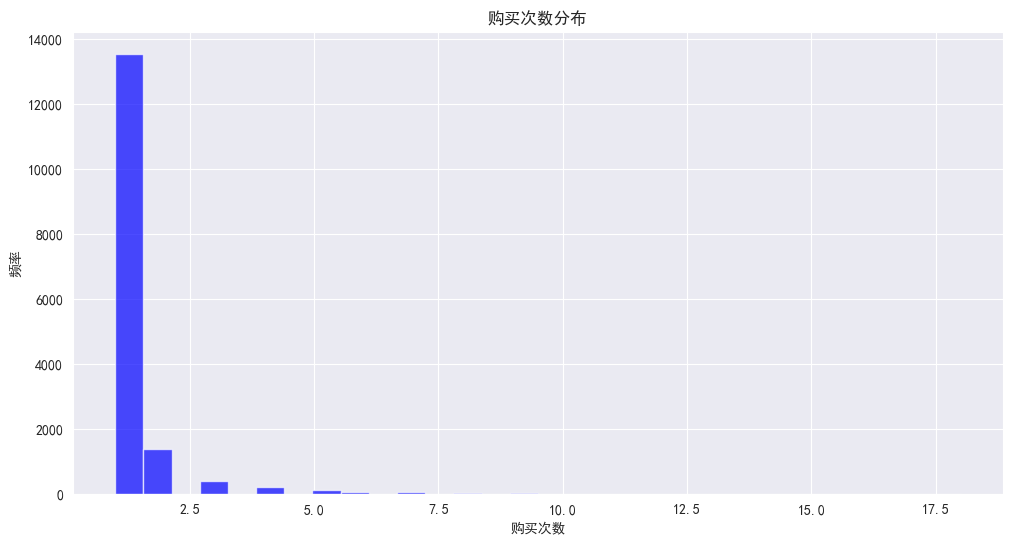

In [6]:
# 绘制购买次数直方图
plt.figure(figsize=(12, 6))
plt.hist(purchase_info['购买次数'], bins=30, color='blue', alpha=0.7)
plt.title('购买次数分布')
plt.xlabel('购买次数')
plt.ylabel('频率')
plt.show()

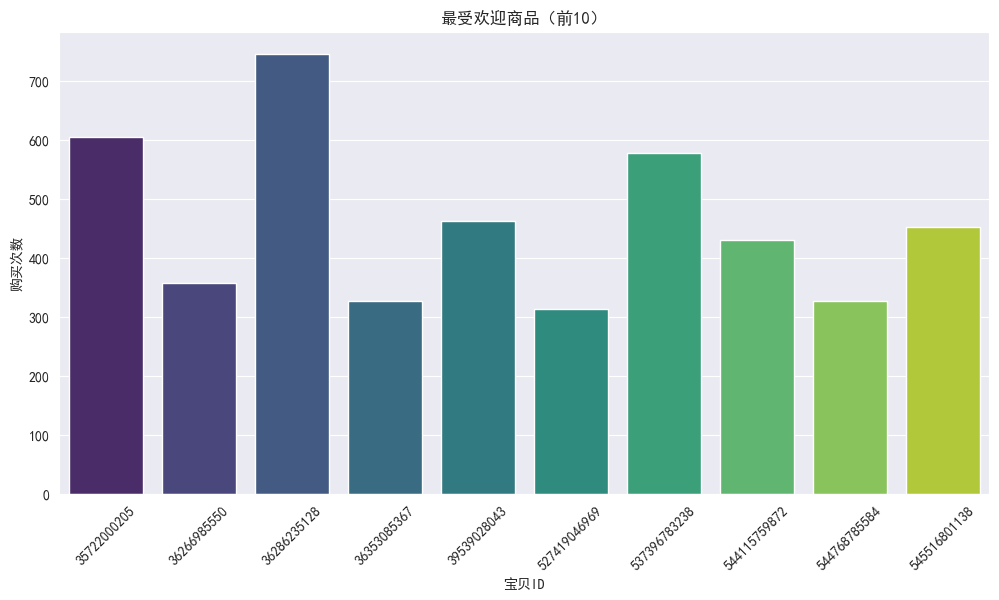

In [8]:
product_summary = purchase_info.groupby('宝贝ID')['购买次数'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=product_summary.sort_values(by='购买次数', ascending=False).head(10), x='宝贝ID', y='购买次数', palette='viridis')
plt.title('最受欢迎商品（前10）')
plt.xticks(rotation=45)
plt.show()

In [18]:
# 计算每个用户对每个商品的购买次数
user_product_counts = purchase_info.groupby(['买家会员名', '宝贝ID'])['购买次数'].sum().reset_index()

# 找出购买次数大于1的记录
preferred_products = user_product_counts[user_product_counts['购买次数'] > 1]
preferred_products = preferred_products.rename(columns={'宝贝ID': '偏好商品ID'})
# 输出结果
'''
按用户和商品分组: 按买家会员名和宝贝ID分组，计算每个用户对每个商品的总购买次数。
筛选偏好商品: 筛选出购买次数大于1的记录，这些记录表示用户偏向于购买这些商品。
'''
preferred_products.info()
preferred_products


<class 'pandas.core.frame.DataFrame'>
Index: 2220 entries, 36 to 15769
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   买家会员名   2220 non-null   int64
 1   偏好商品ID  2220 non-null   int64
 2   购买次数    2220 non-null   int64
dtypes: int64(3)
memory usage: 69.4 KB


,买家会员名,偏好商品ID,购买次数
36,11,531877266868,5
51,14,35722000205,2
58,17,549882564050,4
80,28,544016559367,8
81,28,545516801138,3
...,...,...,...
15731,3397,529338111966,2
15756,3404,42577833473,5
15762,3406,540407272609,2
15765,3407,527419046969,2
